# Lab 3 - Visualization

Last update: 01/11/2023

- Name: Doan Duc Huu
- Student ID: 21120465

***

## Work and submission guidelines

**Work on your assignment**

- You will do your assignment directly in this notebook. First, fill in your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:** 

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [90]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
#!pip install geopandas
import geopandas as gpd

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer when I was a senior student
- Link: https://www.worldometers.info/coronavirus/

In [36]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: The name of the country for the reported data.
    - Total Cases: The total number of confirmed COVID-19 cases in tbe country.
    - New Cases: The number of new confirmed COVID-19 cases in the country.
    - Total Deaths: The total number of deaths due to COVID-19 in the country.
    - New Deaths: The number of new deaths due to COVID-19 in the country.
    - Total Recovered: The total number of recovries from COVID-19 in the country. 
    - Active Cases: The current number of active COVID-19 cases in the country.
    - Critical Cases: The number or critical condition COVID-19 cases in the country.
    - Total Tests: The total number of COVID-19 tests conducted in the country.
    - Population: The total population of the country
 
- Check the data with `info()` function

In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [38]:
# Remove columns with a lot of missing data
df = df.drop(['New Cases', 'New Deaths', 'Critical Cases'], axis=1)

# Replace spaces with NaN
df = df.replace(' ', np.nan)

# Convert columns to float, fill NaN with median, then convert to integer
cols_to_convert = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests']
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').astype(float)
    df[col] = df[col].fillna(df[col].median())
    df[col] = df[col].astype(int)

In [39]:
# TODO: convert data to integer. if the converter returns error, leave it a None
#raise NotImplementedError('not implemented')

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    int32 
 2   Total Deaths     219 non-null    int32 
 3   Total Recovered  219 non-null    int32 
 4   Active Cases     219 non-null    int32 
 5   Total Tests      219 non-null    int32 
 6   Population       219 non-null    object
dtypes: int32(5), object(2)
memory usage: 7.8+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

...


In [40]:
# TODO: fill in the missing data with median value
#raise NotImplementedError('not implemented')
missing_values = df.isnull().sum()
print(missing_values)
# check the result
df.info()

Country Name       0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Total Tests        0
Population         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    int32 
 2   Total Deaths     219 non-null    int32 
 3   Total Recovered  219 non-null    int32 
 4   Active Cases     219 non-null    int32 
 5   Total Tests      219 non-null    int32 
 6   Population       219 non-null    object
dtypes: int32(5), object(2)
memory usage: 7.8+ KB


**TODO**: Why do we have `float64` here?
The float64 data type in Dataframe is likely due to the presence of NaN values in data. In pandas, NaN values are float data type. Therefore, if a column of DataFrame has at least one NaN value, the entire column will be upcast to float64.

In [41]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv('./data/new_data.csv', index=False)
#raise NotImplementedError('not implemented')

In [43]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

AssertionError: 

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [58]:
# # un-comment these lines of code
df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


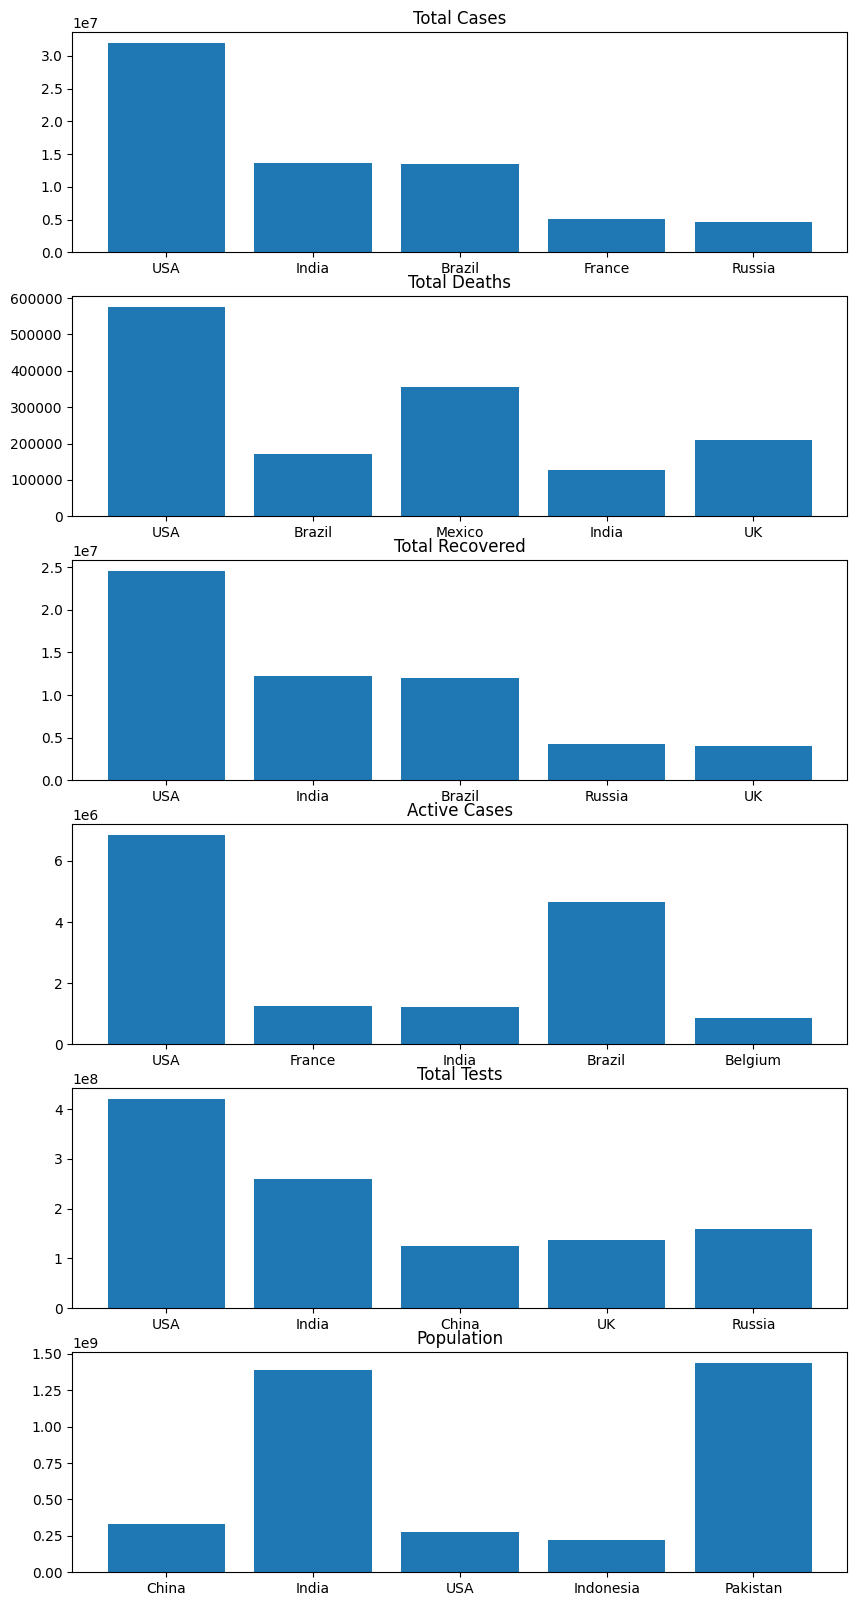

In [46]:
# TODO: draw 6 bar charts
# List of colums to visualize
cols_to_visualize = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests','Population']

# Create a figure with subplot
fig,axs = plt.subplots(len(cols_to_visualize),1,figsize=(10,20));
# Create barchart
for i,col in enumerate(cols_to_visualize):
    top_countries = df.sort_values(by = col, ascending = False)['Country Name'].head(5)
    values = df.loc[df['Country Name'].isin(top_countries),col]
    axs[i].bar(top_countries,values)
    axs[i].set_title(col)


#raise NotImplementedError('not implemented')

**TODO**: Comment about the chart

...

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which show the number of cases for each country. Specifically, you are provided a file named `coord.csv` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

C:\Users\dhuu2\AppData\Local\Temp\ipykernel_13116\2370915386.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


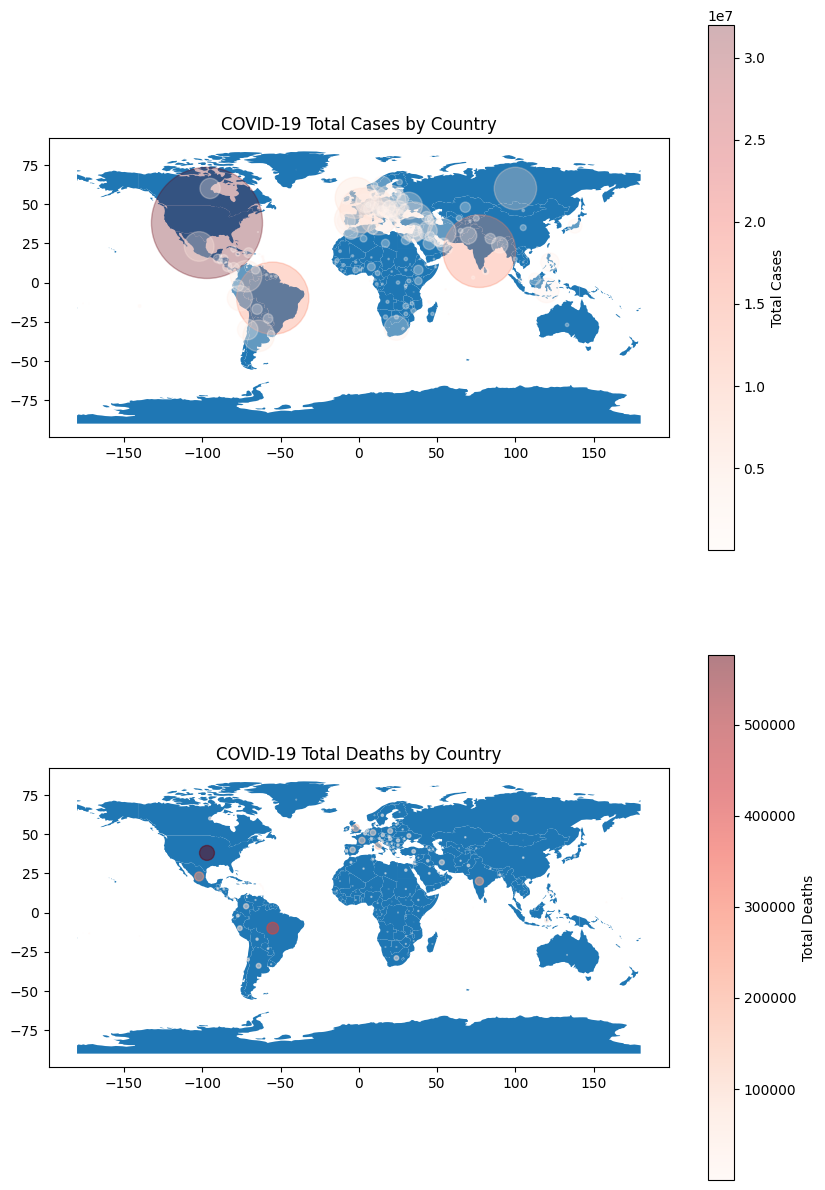

In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the coordinates and the data
coords_json = pd.read_json('./data/coord.json')
coords = pd.DataFrame({
    'Country Name': coords_json.index,
    'latitude': coords_json['lat'],
    'longitude': coords_json['long']
})

data = pd.read_csv('./data/correct_data.csv')

# Merge the dataframes
df = pd.merge(data, coords, on='Country Name')

# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 15))

# Plot the world map on both subplots
world.plot(ax=ax[0])
world.plot(ax=ax[1])

# Plot the total cases on the first subplot
scatter_cases = ax[0].scatter(df['longitude'], df['latitude'], s=df['Total Cases']/5000, c=df['Total Cases'], cmap='Reds', alpha=0.3)
ax[0].set_title('COVID-19 Total Cases by Country')
cbar_cases = plt.colorbar(scatter_cases, ax=ax[0])
cbar_cases.set_label('Total Cases')

# Plot the total deaths on the second subplot
scatter_deaths = ax[1].scatter(df['longitude'], df['latitude'], s=df['Total Deaths']/5000, c=df['Total Deaths'], cmap='Reds', alpha=0.5)
ax[1].set_title('COVID-19 Total Deaths by Country')
cbar_deaths = plt.colorbar(scatter_deaths, ax=ax[1])
cbar_deaths.set_label('Total Deaths')

# Show the plots
plt.show()

**TODO**: Comment about the chart

...

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

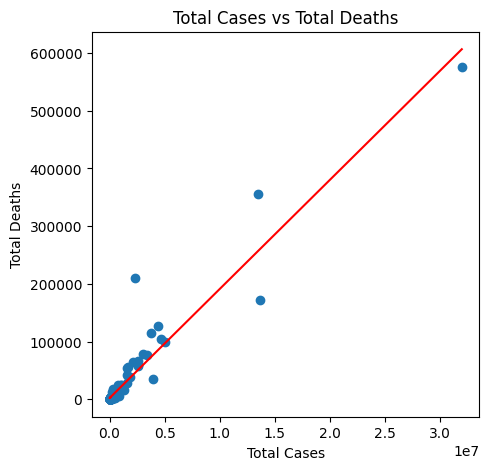

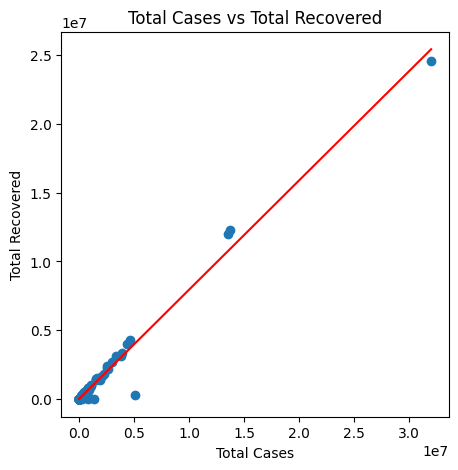

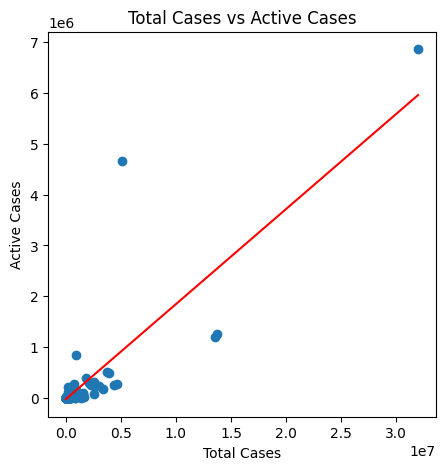

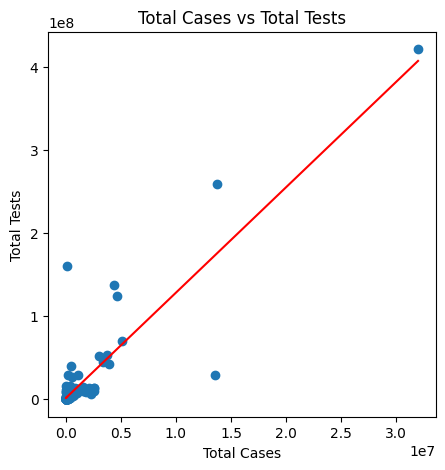

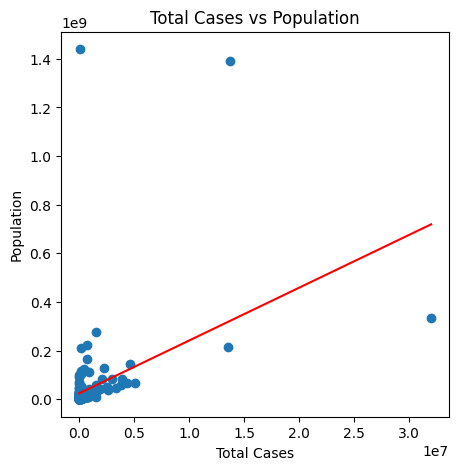

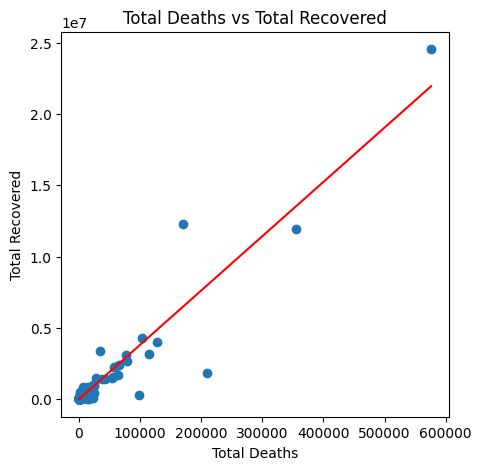

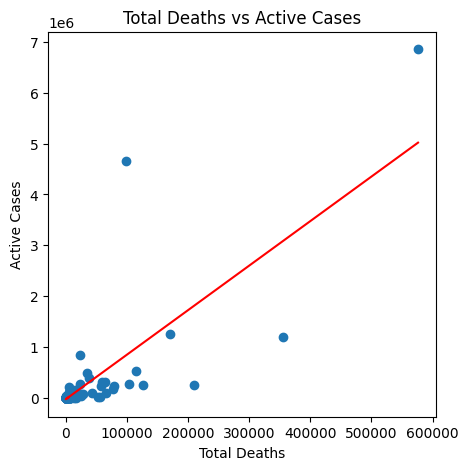

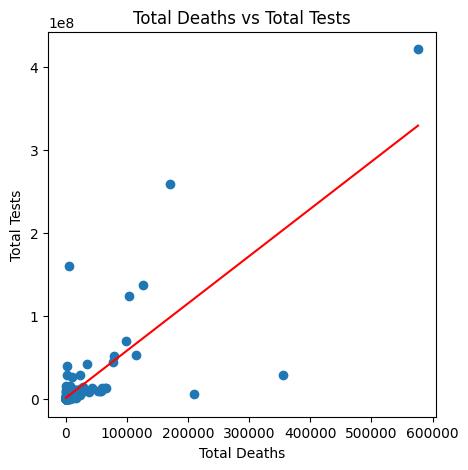

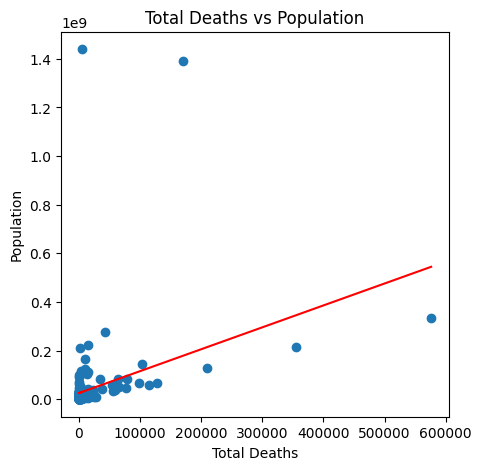

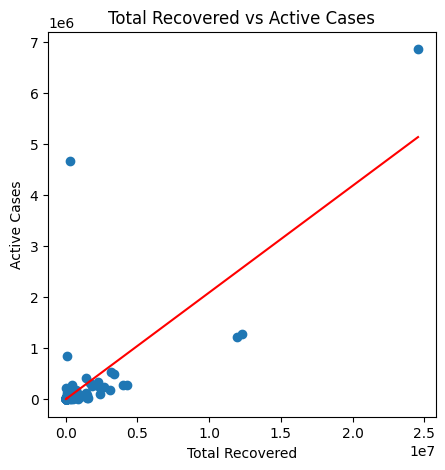

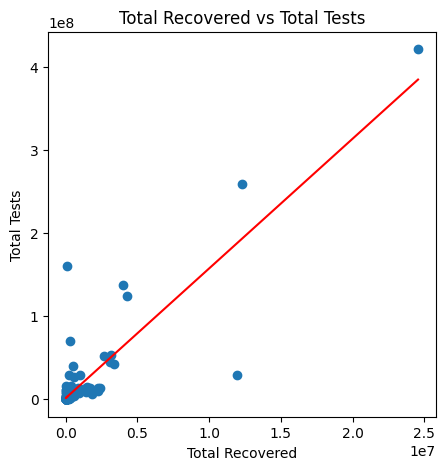

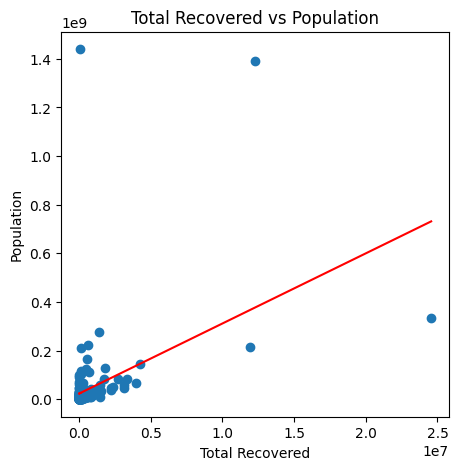

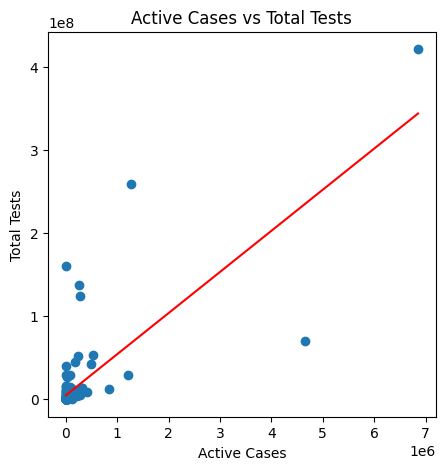

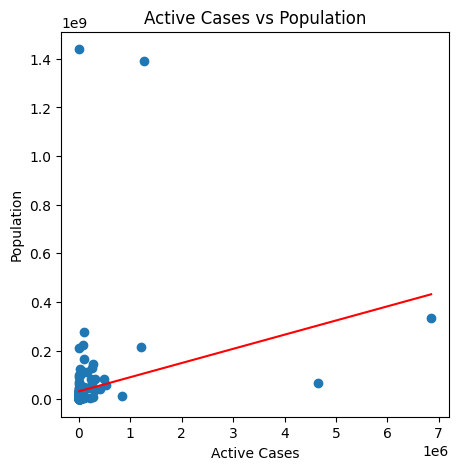

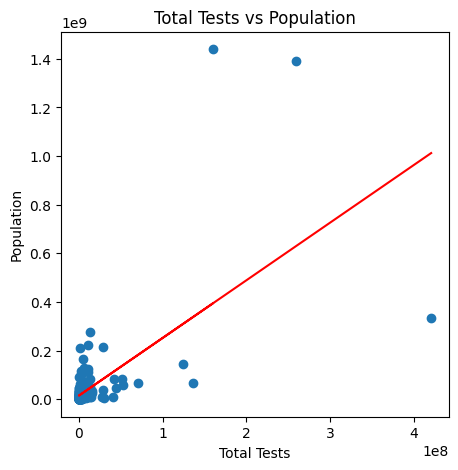

In [86]:
# TODO: scatter stuff
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Select 6 variables
variables = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population']

# Get all combinations of variables
combinations = list(combinations(variables, 2))

# For each pair of variables
for var1, var2 in combinations:
    # Create a scatter plot
    plt.figure(figsize=(5, 5))
    plt.scatter(df[var1], df[var2])
    
    # Calculate the line of best fit
    A = np.vstack([df[var1], np.ones(len(df[var1]))]).T
    m, c = np.linalg.lstsq(A, df[var2], rcond=None)[0]
    
    # Draw the line of best fit
    plt.plot(df[var1], m*df[var1] + c, 'r', label='Fitted line')
    
    # Set the title and labels
    plt.title(f'{var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    
    # Show the plot
    plt.show()
#raise NotImplementedError('not implemented')

**TODO**: As showed above, give your prediction about the relationship between each pair.

...

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

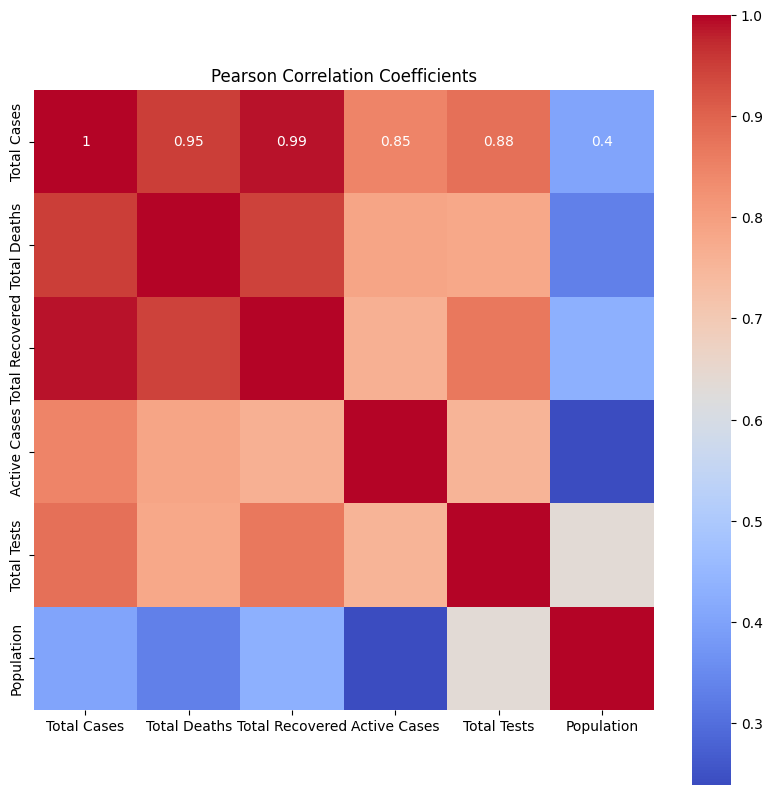

In [87]:
# TODO: create heatamp
import seaborn as sns
import pandas as pd

# Calculate the Pearson correlation coefficients
correlation_matrix = df[variables].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Pearson Correlation Coefficients')

# Show the plot
plt.show()
#raise NotImplementedError('not implemented')

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader

...

In [88]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
training_data = datasets.MNIST('./data', download=True, train=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True)

# Download and load the test data
testing_data = datasets.MNIST('./data', download=True, train=False, transform=transform)
test_dataloader = torch.utils.data.DataLoader(testing_data, batch_size=32, shuffle=True)
#raise NotImplementedError('not implemented')

100%|██████████| 9912422/9912422 [00:04<00:00, 2229326.52it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14458784.18it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2001912.61it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4528293.03it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

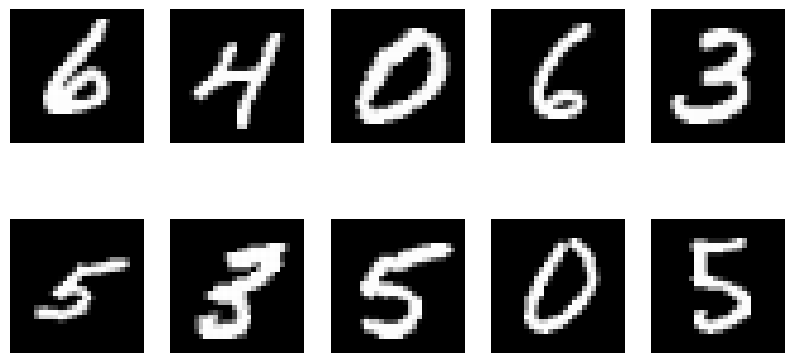

In [93]:
# Get some random training images
dataiter = iter(train_dataloader)
try:
    images, labels = next(dataiter)
except StopIteration:
    pass
images = images[:10]

# Create a grid of images and display them
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.axis('off')

plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [94]:
# TODO: create Mnist_FC and Mnist_CNN
#raise NotImplementedError('not implemented')
import torch
import torch.nn as nn
import torch.nn.functional as F

# Fully connected neural network model
class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convolutional neural network model
class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [95]:
ataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Create the models
model_fc = Mnist_FC()
model_cnn = Mnist_CNN()

# Test the models
output_fc = model_fc(images)
output_cnn = model_cnn(images)

# Print the output shape
print("Output shape for FC model: ", output_fc.shape)
print("Output shape for CNN model: ", output_cnn.shape)

Output shape for FC model:  torch.Size([32, 10])
Output shape for CNN model:  torch.Size([32, 10])


### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?

...

In [96]:
# TODO: design train and test function
def train(model, train_loader, criterion, optimizer, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = correct / total
    return accuracy

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

#raise NotImplementedError('not implemented')

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about

...

In [ ]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
#raise NotImplementedError('not implemented')
# Define the loss function and optimizer
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer_fc = torch.optim.Adam(model_fc.parameters(), lr=learning_rate)
optimizer_cnn = torch.optim.Adam(model_cnn.parameters(), lr=learning_rate)

# Train the models for 20 epochs
n_epochs = 20
history_fc = {}
history_cnn = {}
for epoch in range(1, n_epochs + 1):
    train(model_fc, train_dataloader, loss_fn, optimizer_fc, n_epochs)
    train(model_cnn, train_dataloader, loss_fn, optimizer_cnn, n_epochs)
    accuracy_fc = test(model_fc, test_dataloader)
    accuracy_cnn = test(model_cnn, test_dataloader)
    history_fc[epoch] = accuracy_fc
    history_cnn[epoch] = accuracy_cnn
    print(f'Epoch {epoch}: FC Accuracy: {accuracy_fc}, CNN Accuracy: {accuracy_cnn}')

### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

...

In [ ]:
# TODO: visualize the history
raise NotImplementedError('not implemented')

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` using Colab